<a href="https://colab.research.google.com/github/troncosofranco/ML-Notebooks/blob/main/Data_Scientist_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scope

This project analyzes data scientist salaries for 2023. Univariate and bivariate analysis is performed. Correlation and prediction using ML algorithms are carried out for salary prediction.

##Data Attributes

1. work_year [categorical] : year in which the salary was disbursed.
2. experience_level [categorical] : The level of experience a person holds in a particular job.
3. employment_type [categorical] : full-time, part-time, or contractual.
4. job_title [categorical] : The role an individual holds within a company.
5. salary [numerical] : The total gross salary paid to the individual.
6. salary_currency [categorical] : The specific currency in which the salary is paid.
salaryinusd [numerical] : The total gross salary amount converted to US dollars.
7. employee_residence [categorical]: Residence of the employee, denoted by an ISO 3166 code. The cost of living of different countries affects the salary levels.
8. remote_ratio [ratio]: The proportion of work done remotely. Companies may adjust salaries based on the cost of living in the employee's location.
9. company_location [categorical]: The location of the employer's main office. Companies in different locations may offer different salary scales based on especific cost of living.
10. company_size [categorical]: The median number of employees in the company. Commonly, larger companies often have structured salary scales and may offer higher salaries due to economies of scale and larger revenue streams.

#1. Import modules

In [1]:
import numpy as np
import pandas as pd

# Country code libraries
!pip install pycountry -q
import pycountry

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
import matplotlib.ticker as mtick
import plotly.graph_objects as go

# ML libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

# Import Statistics libraries
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 85.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#2. Load Data

In [2]:
df=pd.read_csv('ds_salaries.csv')

**Check null and missing Values and duplicates**

In [3]:
print(f'The number os null values is {df.isnull().sum().sum()}')
print(f'The number os duplicated row is {df.duplicated().sum()}')


The number os null values is 0
The number os duplicated row is 1171


#3. Data Processing

**Check unique values in each attribute**

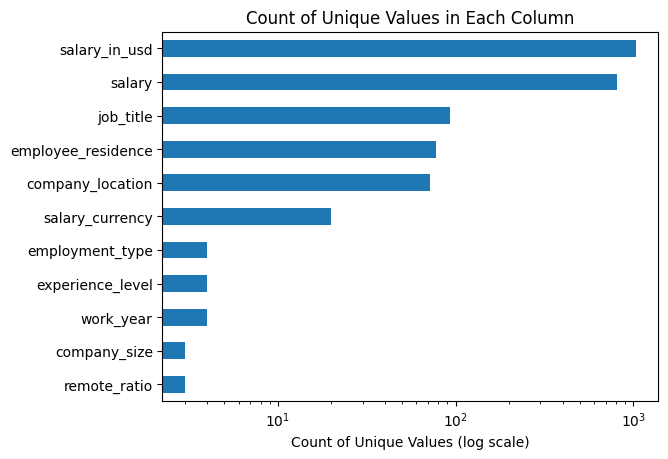

In [4]:
unique_counts = {col: df[col].nunique() for col in df.columns}

# Convert the counts into a Series
unique_counts = pd.Series(unique_counts)

# Sort the Series in descending order
unique_counts = unique_counts.sort_values(ascending=True)

# Create a horizontal bar plot
unique_counts.plot(kind='barh')

plt.xscale('log')

plt.xlabel('Count of Unique Values (log scale)')
plt.title('Count of Unique Values in Each Column')
plt.show()

**Rename ordinal and categorical values**

In [5]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

**Cardinality Reduction**

Cardinality refers to the number of unique values in a column or feature. In machine learning, high cardinality features can sometimes pose a challenge for certain models because:

- High cardinality might cause a model to overfit, especially in scenarios where there are categories with very few observations.
- They can significantly increase the dimensionality of data when one-hot encoding is used.
- High cardinality can increase computation time and memory usage, especially in tree-based algorithms.

How many job titles in the dataset?

In [6]:
print('how many job titles in the dataset: ',df['job_title'].value_counts().size)

how many job titles in the dataset:  93


Which are top 10 frequent job titles?

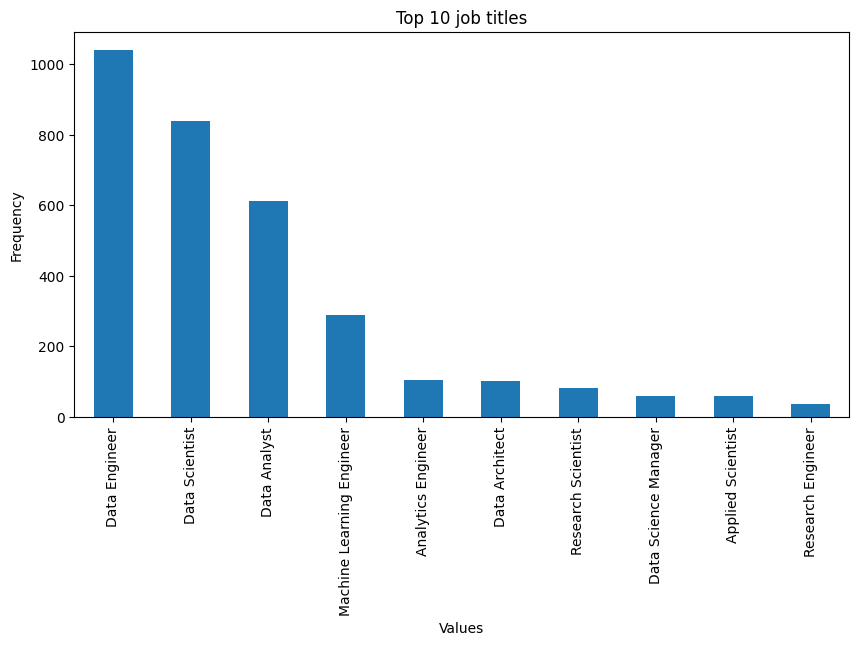

In [7]:
top_10 = df['job_title'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10,5))
top_10.plot(kind='bar')
plt.title('Top 10 job titles')
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Data scientist, data engineer and data analyst ranked top 3 frequent job titles, but it can be easily seen that others are also related to those top 3 job titles.

**Percentages of employment type**

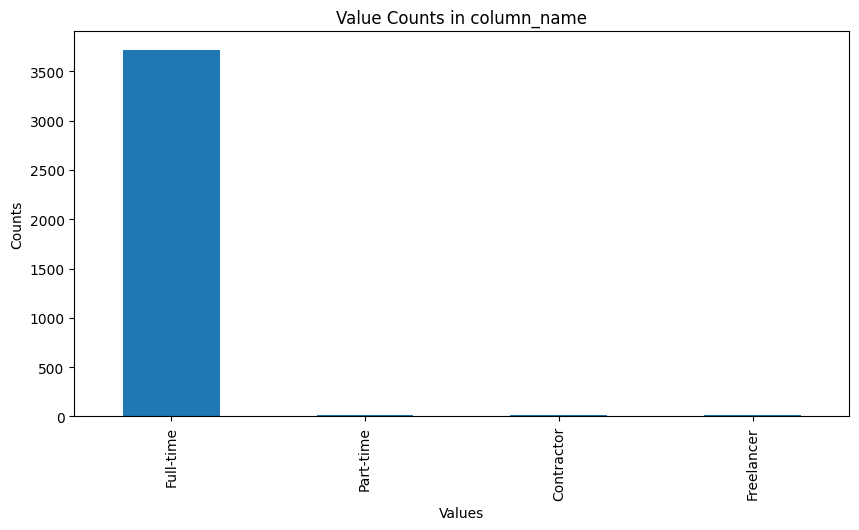

In [8]:
counts = df['employment_type'].value_counts()

# Plotting
plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.title('Value Counts in column_name')
plt.ylabel('Counts')
plt.xlabel('Values')
plt.show()

Most of employee types are full-time.

**Size company**

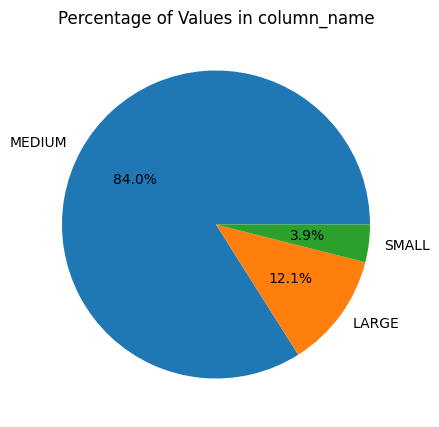

In [9]:
counts = df['company_size'].value_counts()

# Plotting
plt.figure(figsize=(10,5))
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
plt.title('Percentage of Values in column_name')
plt.show()

84% of companies are medium-size.

In [10]:
def job_category(job_title):
    data_analyst = ["Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_engineering = ["Data Engineer","BI Data Engineer", "Business Intelligence Engineer","Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

    if job_title in data_analyst:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_engineering:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column
df['job_category'] = df['job_title'].apply(job_category)

**Adjust the present value to salary in usd based on inflation rates**

In [11]:
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065, 2023:0.049} #April 2023
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088, 2023: 0.091}

# Function adjust salary
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

# Apply the function to the dataset
df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

#4. EDA

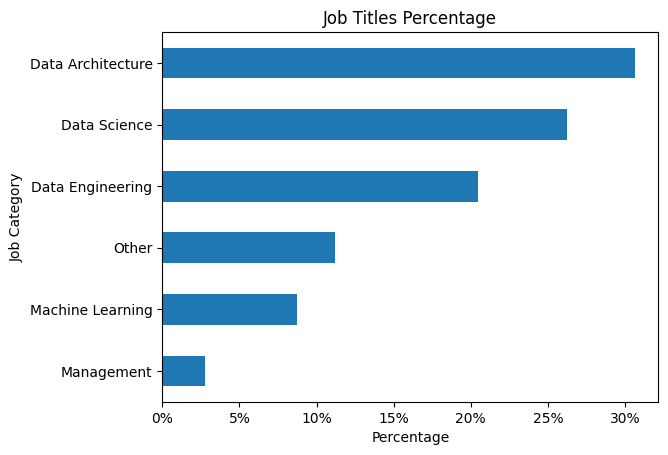

In [12]:
prop_job = df['job_category'].value_counts(normalize=True).sort_values(ascending=True)

ax = prop_job.plot(kind='barh')
# Format x-axis as percentage

fmt = '{x:,.0%}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

Adjust Salary across differente employments categories.

In [13]:
count_A = df[df['employment_type'] == 'Contractor']['adjusted_salary'].value_counts()
print(count_A)

30000.00000     1
25500.00000     1
95850.00000     1
63900.00000     1
7987.50000      1
33150.27200     1
301064.85000    1
117080.77500    1
463862.88000    1
112877.01765    1
Name: adjusted_salary, dtype: int64


In [14]:
df.describe()

work_year        salary  salary_in_usd  adjusted_salary
count  3755.000000  3.755000e+03    3755.000000      3755.000000
mean   2022.373635  1.906956e+05  137570.389880    142445.659208
std       0.691448  6.716765e+05   63055.625278     64701.591333
min    2020.000000  6.000000e+03    5132.000000      5583.616000
25%    2022.000000  1.000000e+05   95000.000000    100000.000000
50%    2022.000000  1.380000e+05  135000.000000    139000.000000
75%    2023.000000  1.800000e+05  175000.000000    181050.000000
max    2023.000000  3.040000e+07  450000.000000    507946.579425

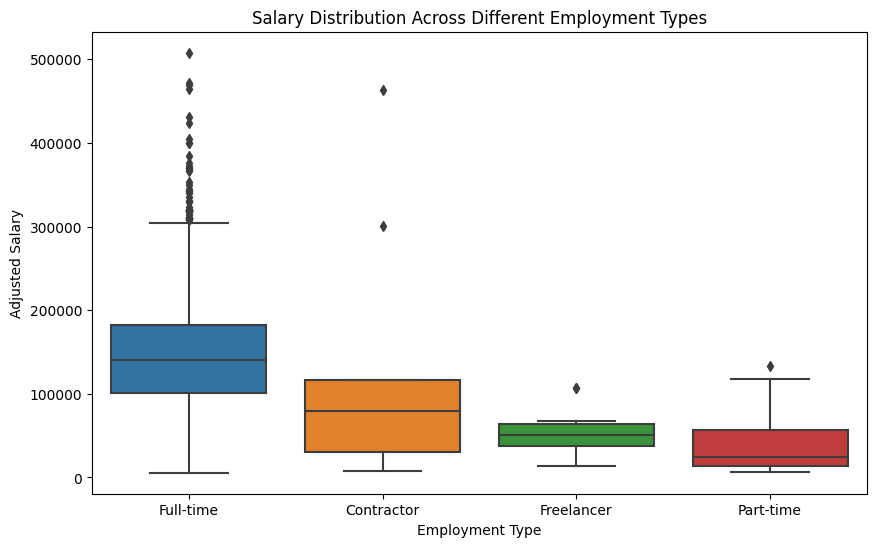

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='adjusted_salary')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

**Salary Distribution**

adjusted_salary: mu = 142445.66, sigma = 64692.98
adjusted_salary: Skewness: 0.58
adjusted_salary: Kurtosis: 1.14


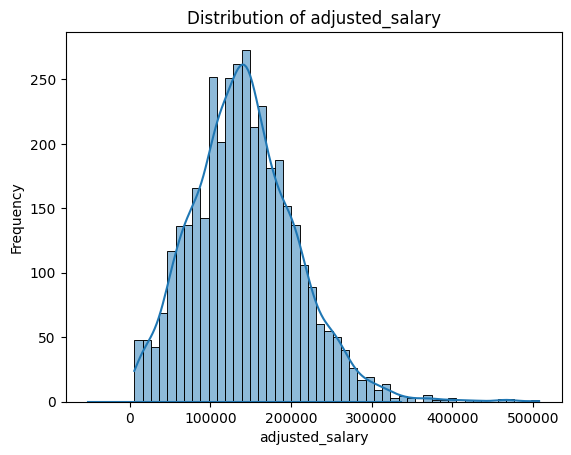

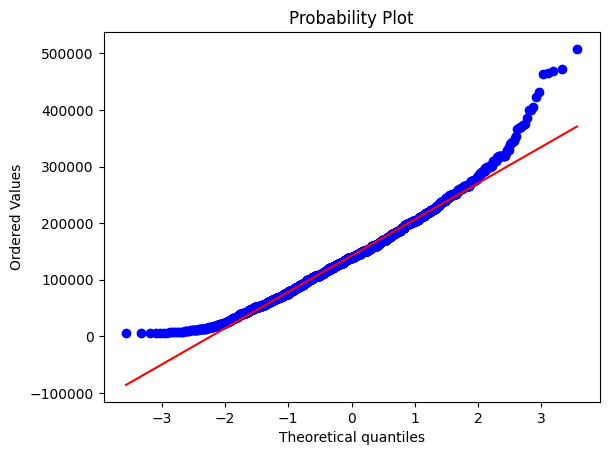

In [16]:
def data_distribution(df, target_col):
    sns.histplot(df[target_col], kde=True)

    # Fit a normal distribution to the data of target feature
    (mu, sigma) = stats.norm.fit(df[target_col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(target_col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(target_col, df[target_col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(target_col, df[target_col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(target_col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(target_col))

    # Plot the QQ-plot
    fig = plt.figure()
    stats.probplot(df[target_col], plot=plt)

    plt.show()

    return

data_distribution(df,'adjusted_salary')

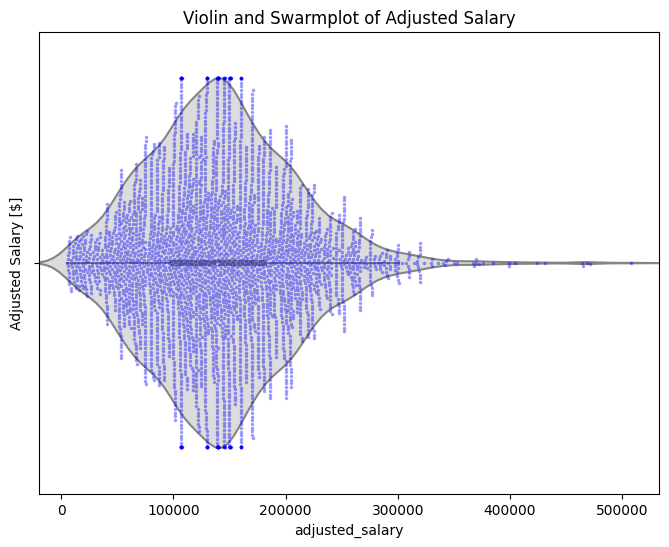

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=df['adjusted_salary'], color='blue', alpha=0.4, size=2.5)
plt.ylabel('Adjusted Salary [$]')
plt.title('Violin and Swarmplot of Adjusted Salary')
plt.show()

In [18]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_category',
       'adjusted_salary'],
      dtype='object')

**Media yearly salary by job category**

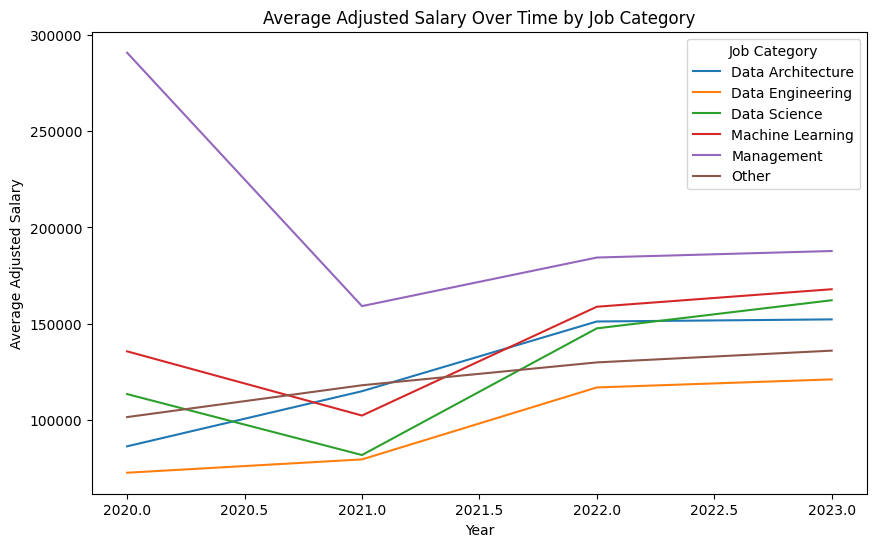

In [19]:
# Calculate average salary and standard deviation for each job category for each year
average_salary = df.groupby(['work_year', 'job_category'])['adjusted_salary'].mean()
salary_std = df.groupby(['work_year', 'job_category'])['adjusted_salary'].std()

# Convert Series to DataFrame
average_salary = average_salary.reset_index()
salary_std = salary_std.reset_index()

# Merge average_salary and salary_std DataFrames
salary_stats = pd.merge(average_salary, salary_std, on=['work_year', 'job_category'], suffixes=('_avg', '_std'))

plt.figure(figsize=(10, 6))

# Create lineplot with error bars
sns.lineplot(x='work_year', y='adjusted_salary_avg', hue='job_category', data=salary_stats)

plt.title('Average Adjusted Salary Over Time by Job Category')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Salary')
plt.legend(title='Job Category')

plt.show()

**Adjusted Salary by Location**

In [20]:
# Convert ISO 3166 country code to country name
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code

# Function to convert country code to full name
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

df['company_location'] = df['company_location'].apply(country_code_to_name)
df['employee_residence'] = df['employee_residence'].apply(country_code_to_name)

In [21]:
avg_salary_by_location = df.groupby('company_location', as_index=False)['adjusted_salary'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'adjusted_salary': 'Average Adjusted Salary'},
                     projection='natural earth')

fig1.show()

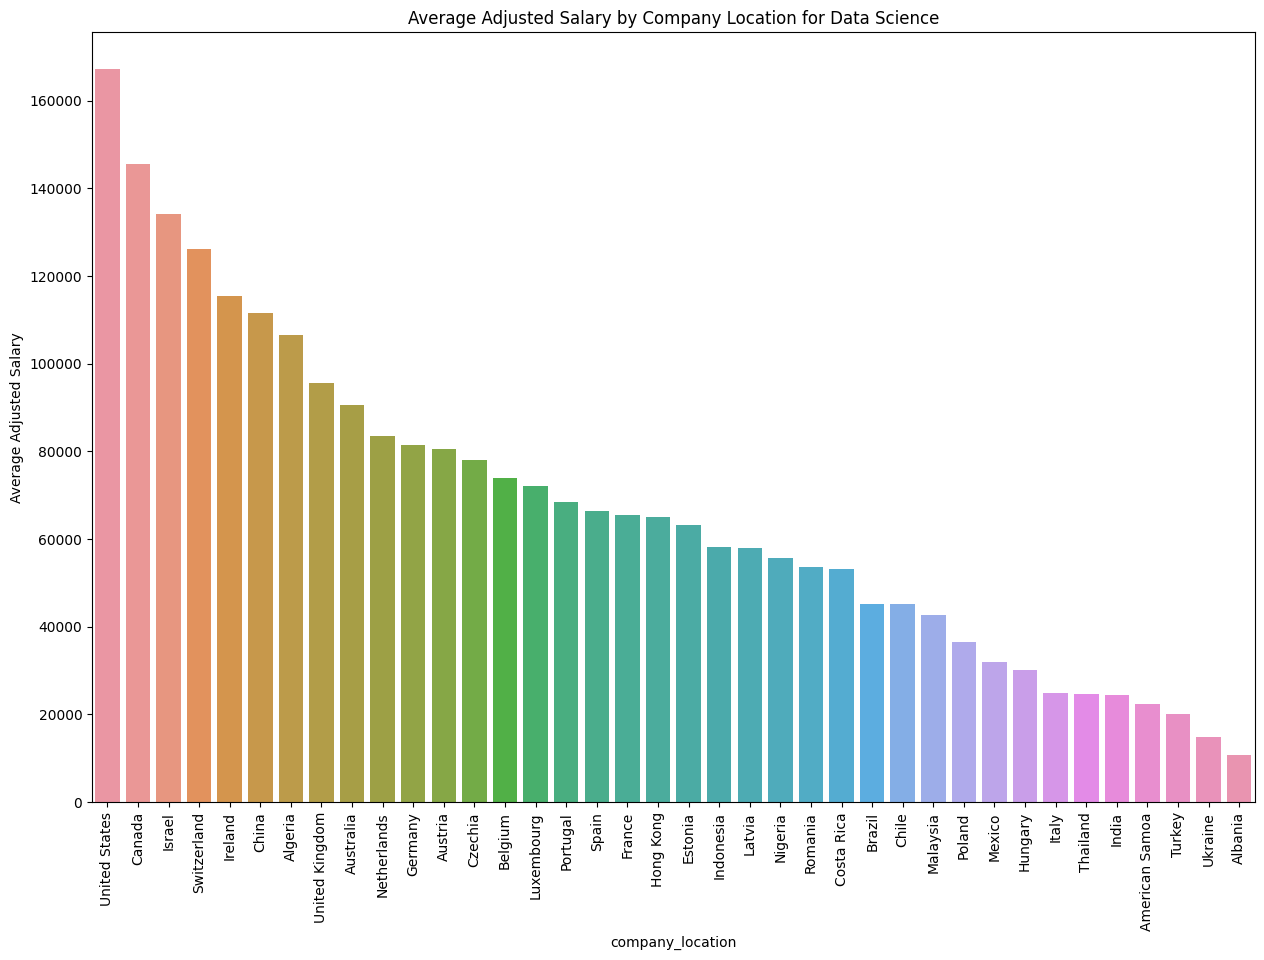

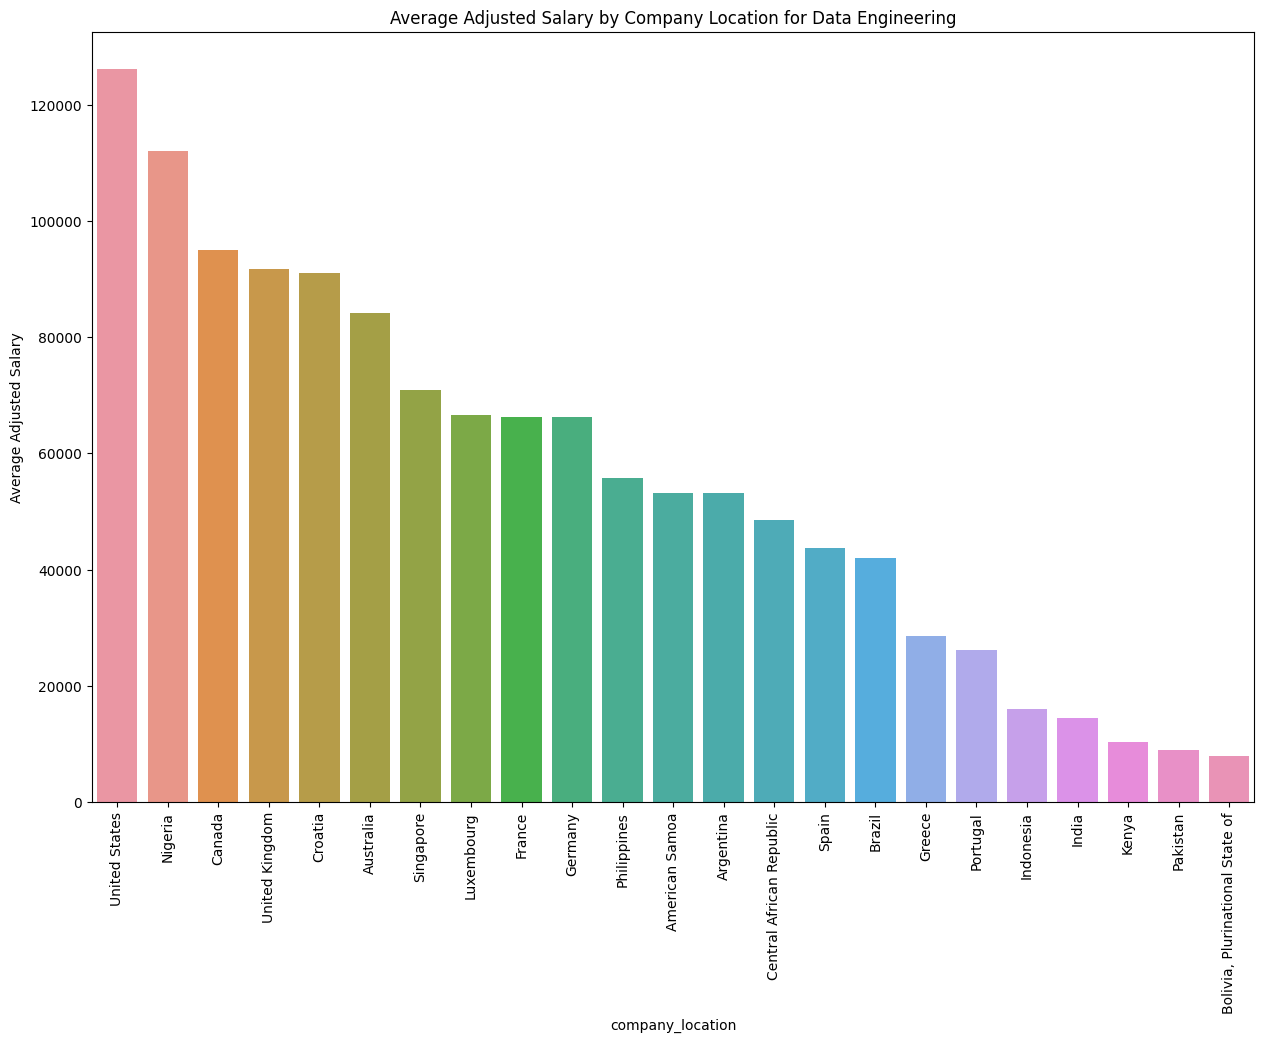

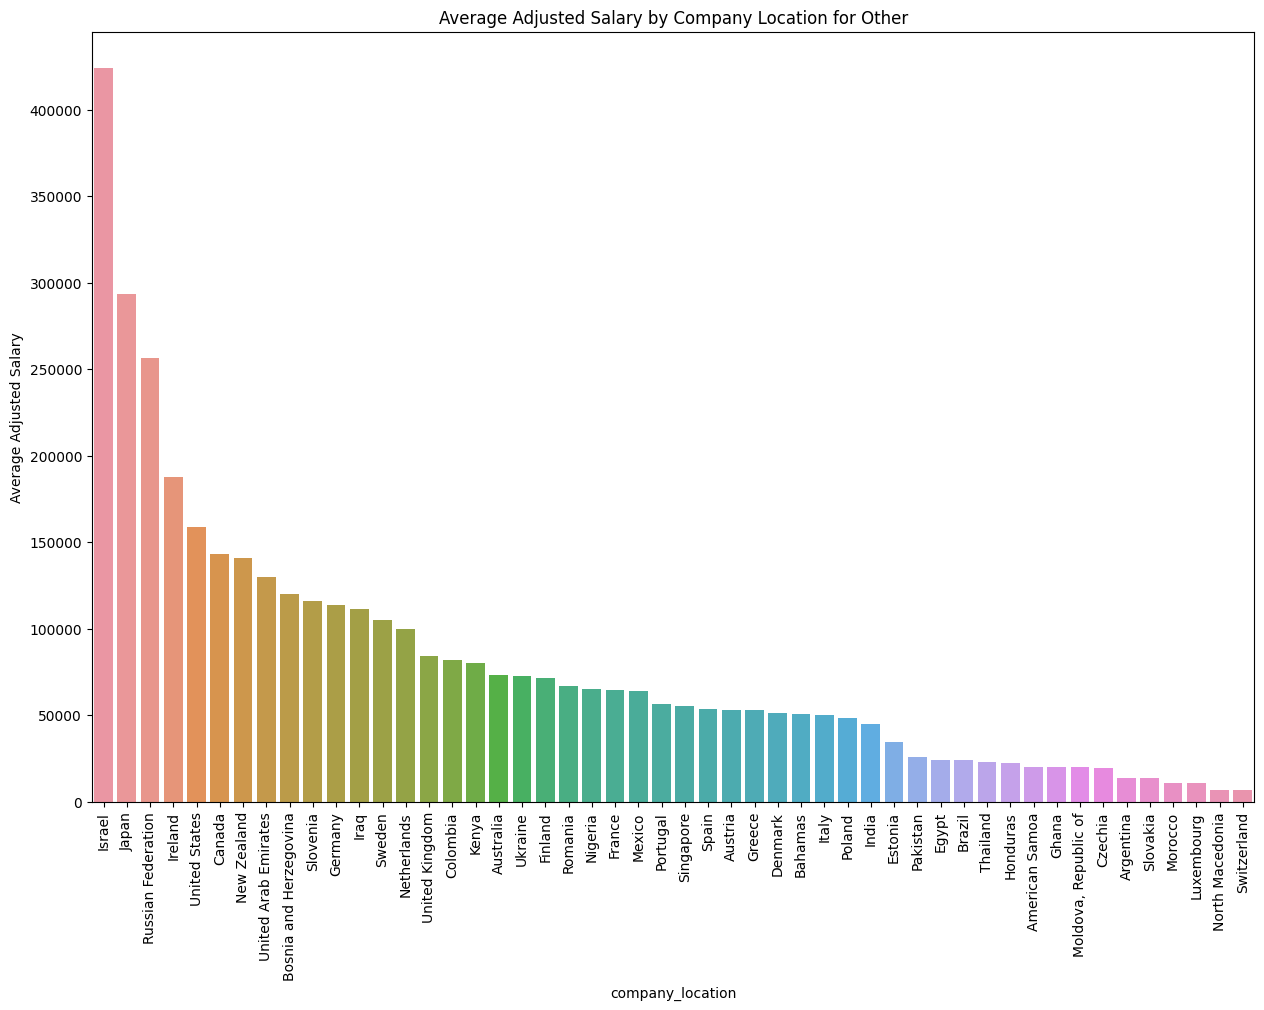

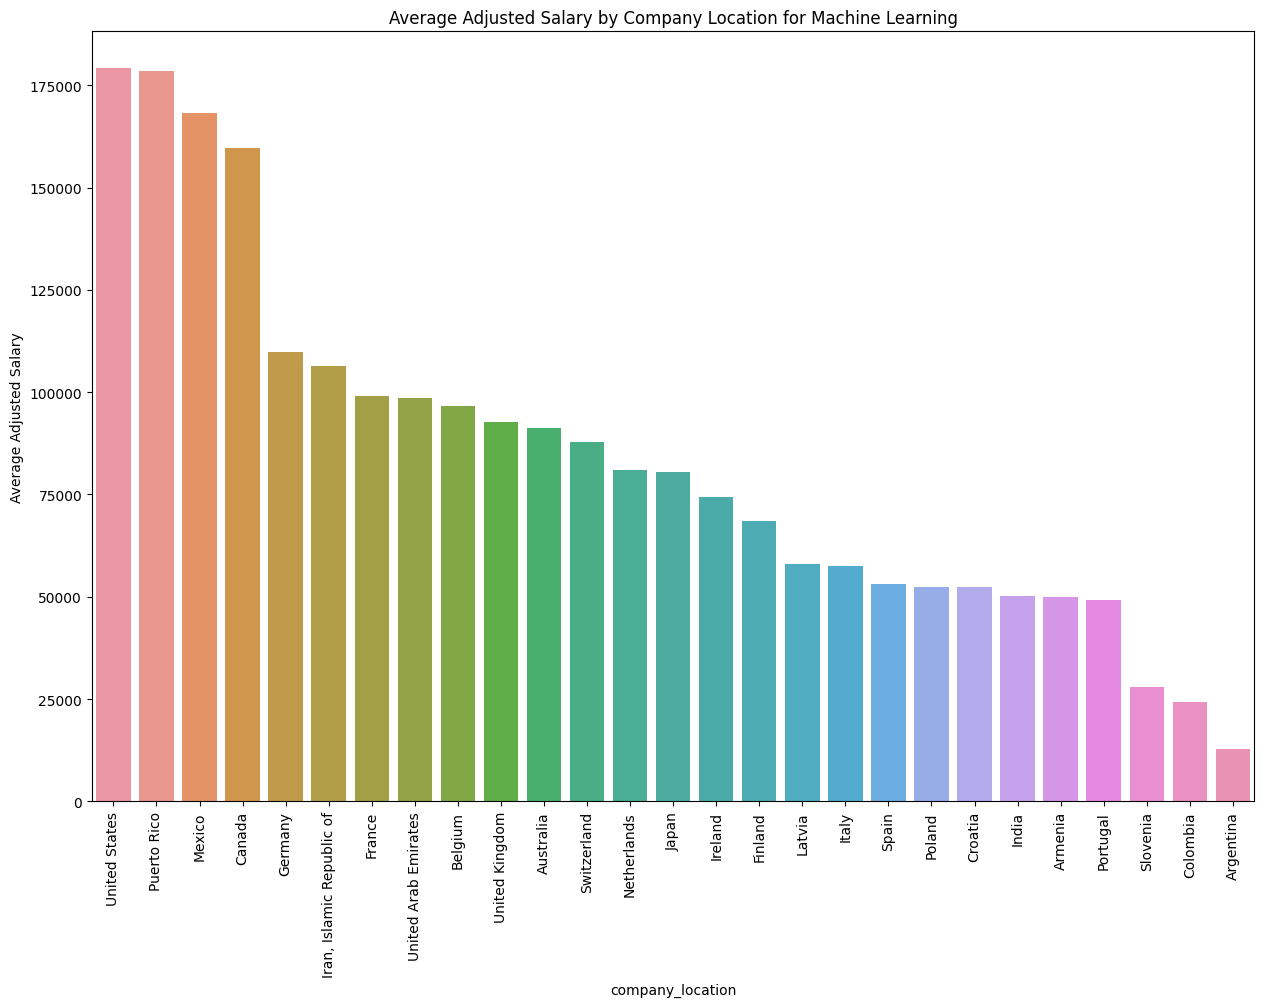

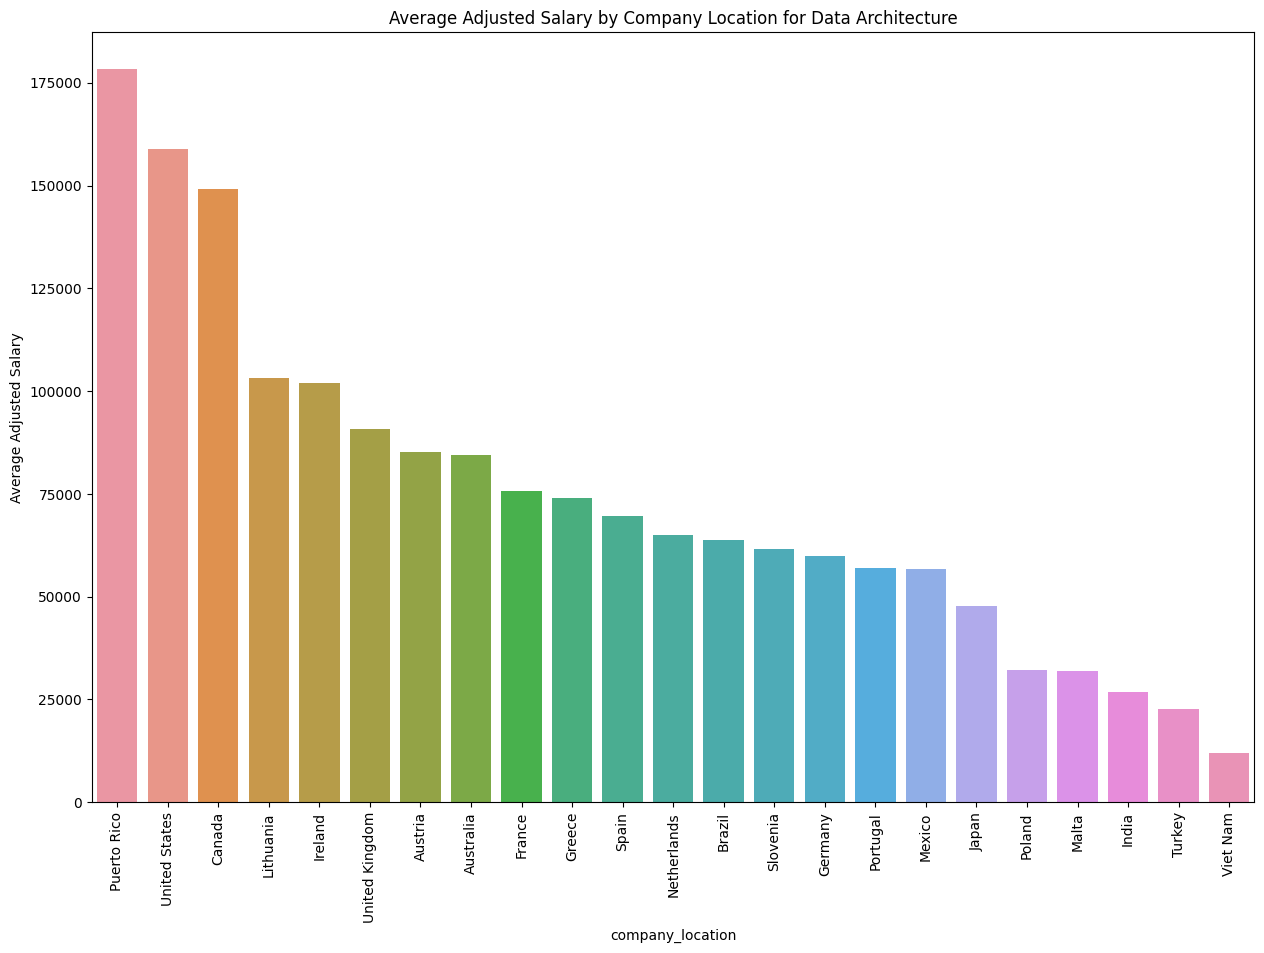

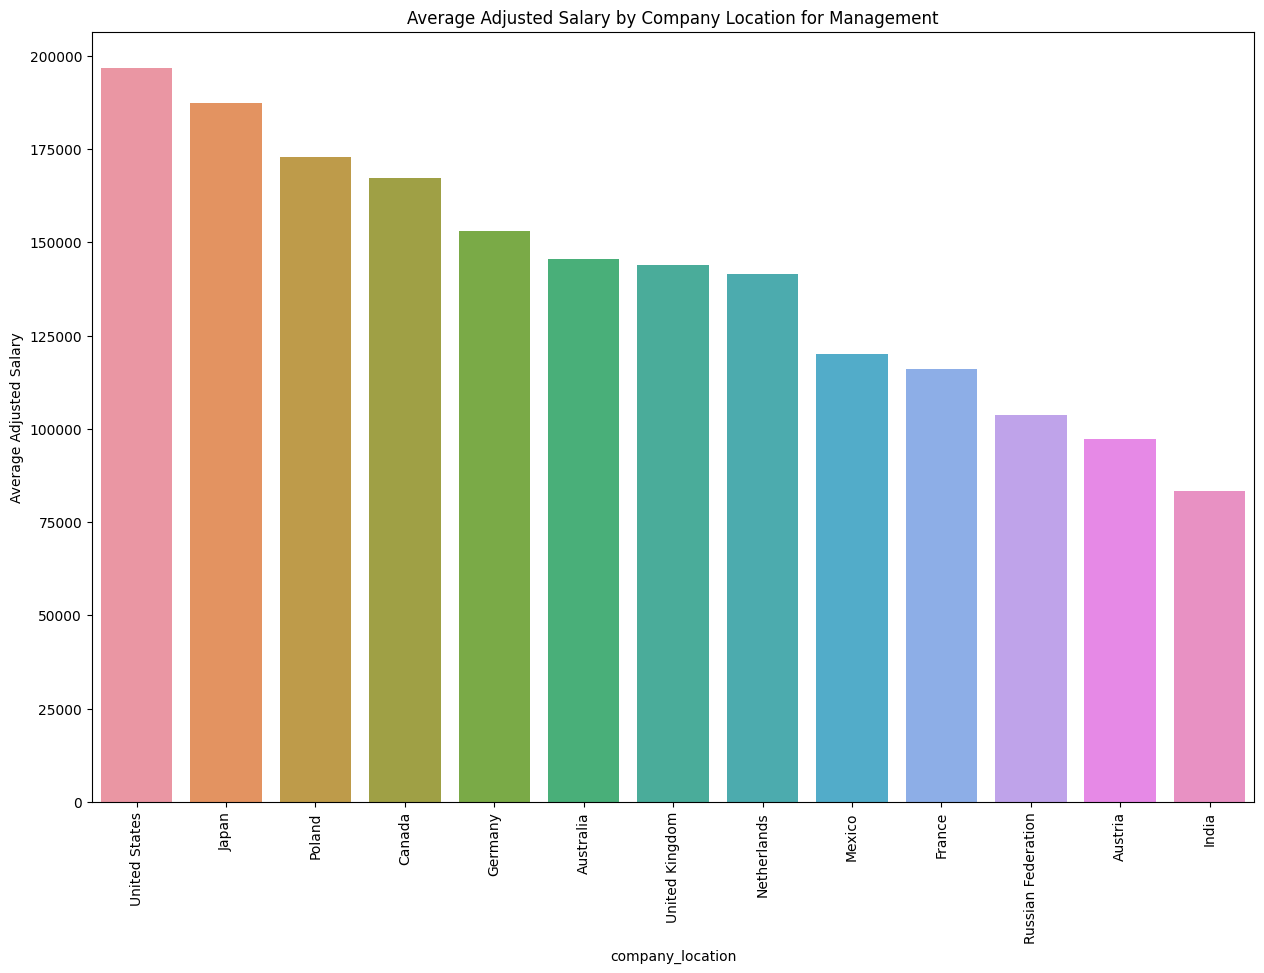

In [22]:
def salary_location(location):
  # Calculate average salary for each job category for each location
  average_salary = df.groupby([location, 'job_category'])['adjusted_salary'].mean().reset_index()

  # Get unique job categories
  job_categories = average_salary['job_category'].unique()

  # Create a bar plot for each job category
  for job_category in job_categories:
      plt.figure(figsize=(15, 10))
      category_data = average_salary[average_salary['job_category'] == job_category]

      # Sort average_salary DataFrame in descending order
      category_data = category_data.sort_values('adjusted_salary', ascending=False)

      sns.barplot(x=location, y='adjusted_salary', data=category_data, order=category_data[location])

      plt.title(f'Average Adjusted Salary by Company Location for {job_category}')
      plt.xlabel(location)
      plt.ylabel('Average Adjusted Salary')

      plt.xticks(rotation=90) # Rotates X-axis labels for readability

      plt.show()

  return

salary_location('company_location')

**Adjusted vs employee location**

In [23]:
avg_salary_by_residence = df.groupby('employee_residence', as_index=False)['adjusted_salary'].mean()

fig2 = px.choropleth(avg_salary_by_residence,
                     locations='employee_residence',
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='employee_residence',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Employee Residence',
                     labels={'adjusted_salary': 'Average Adjusted Salary'},
                     projection='natural earth')

fig2.show()

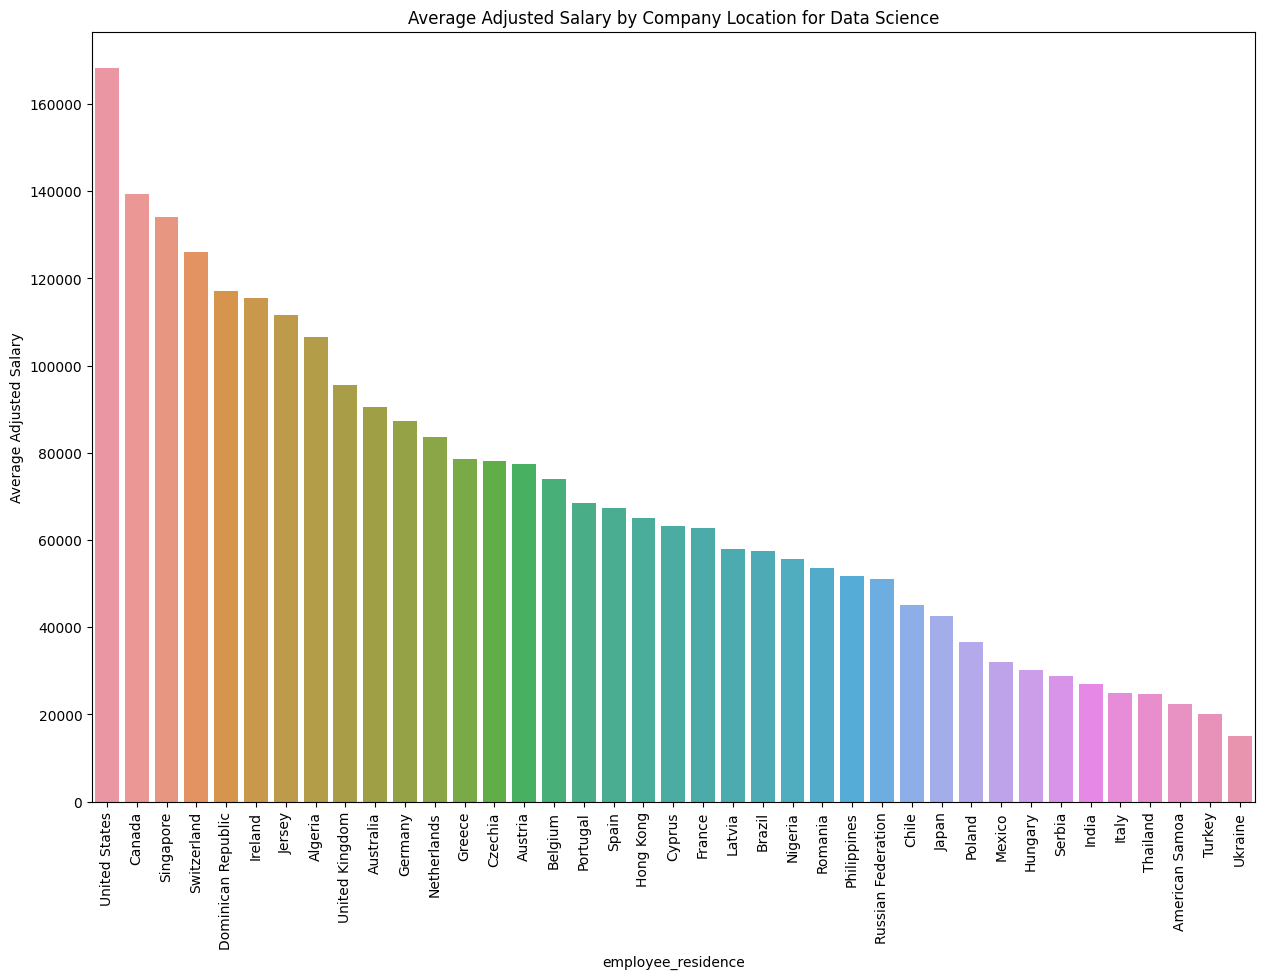

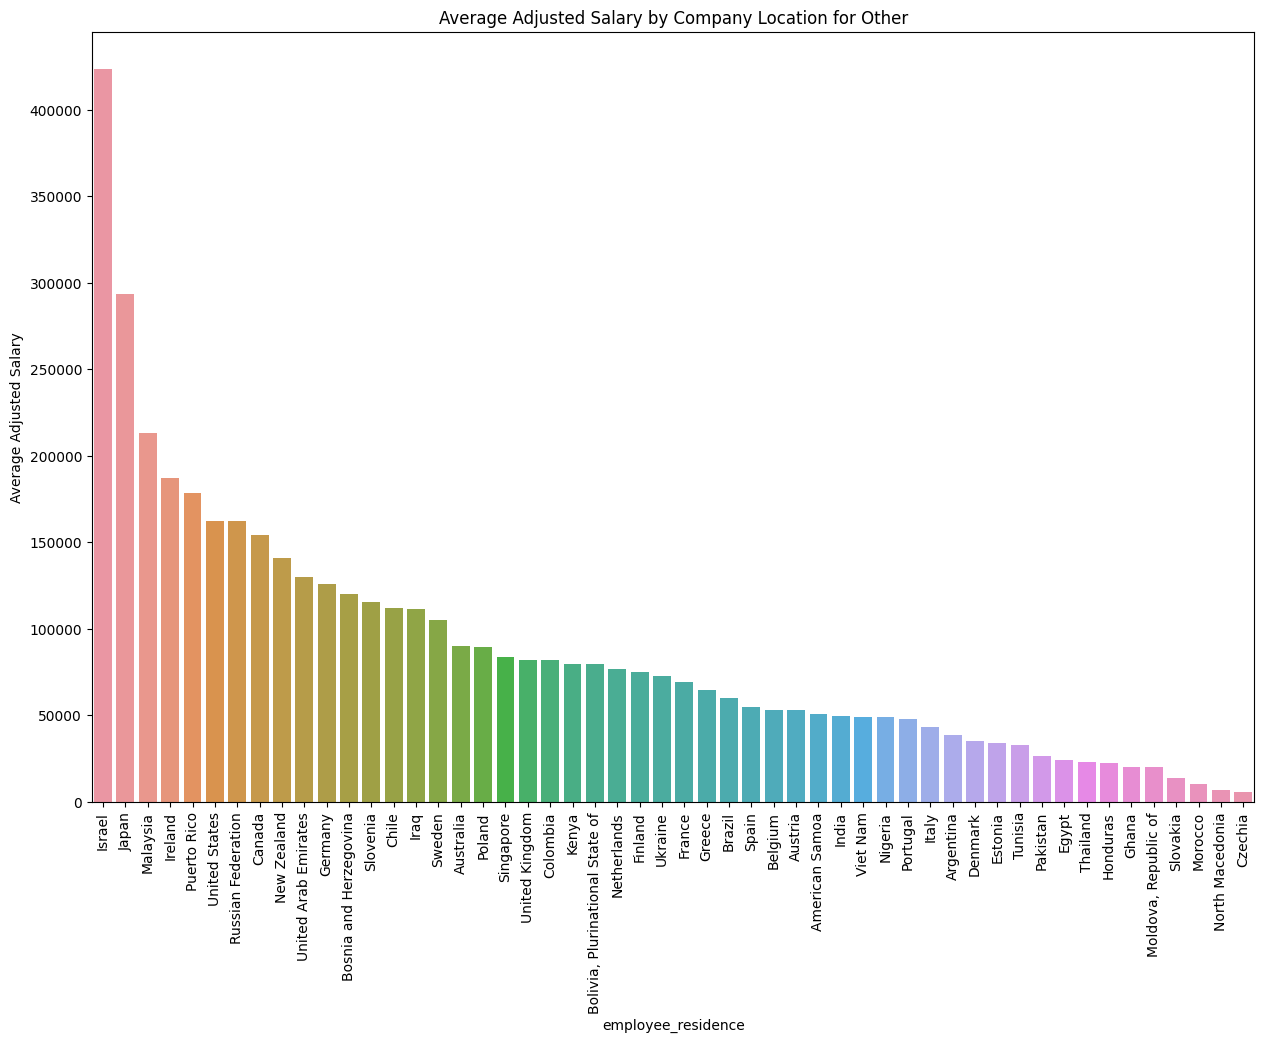

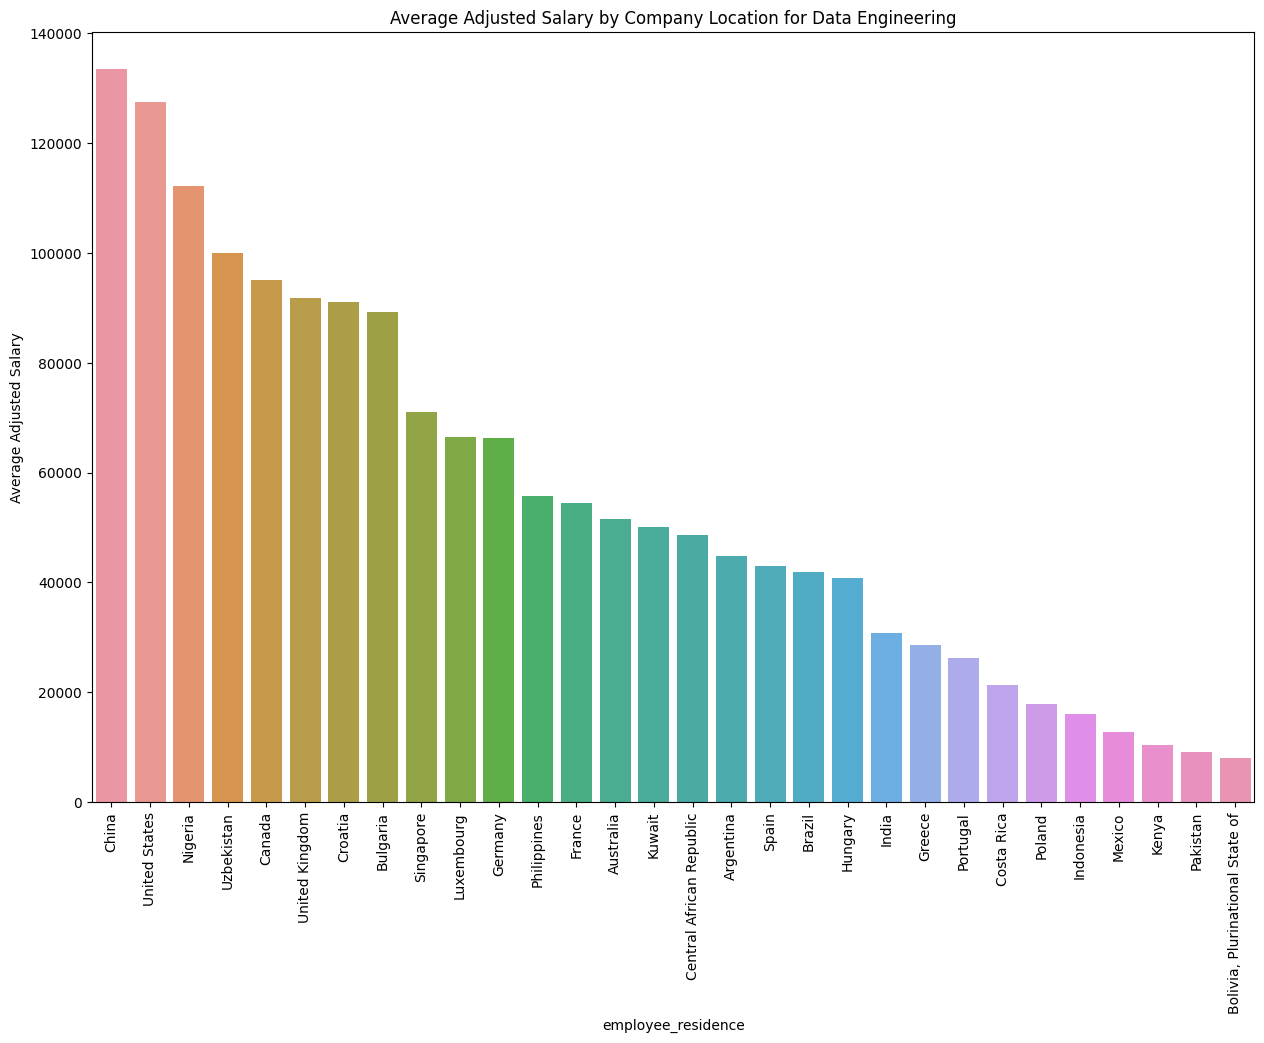

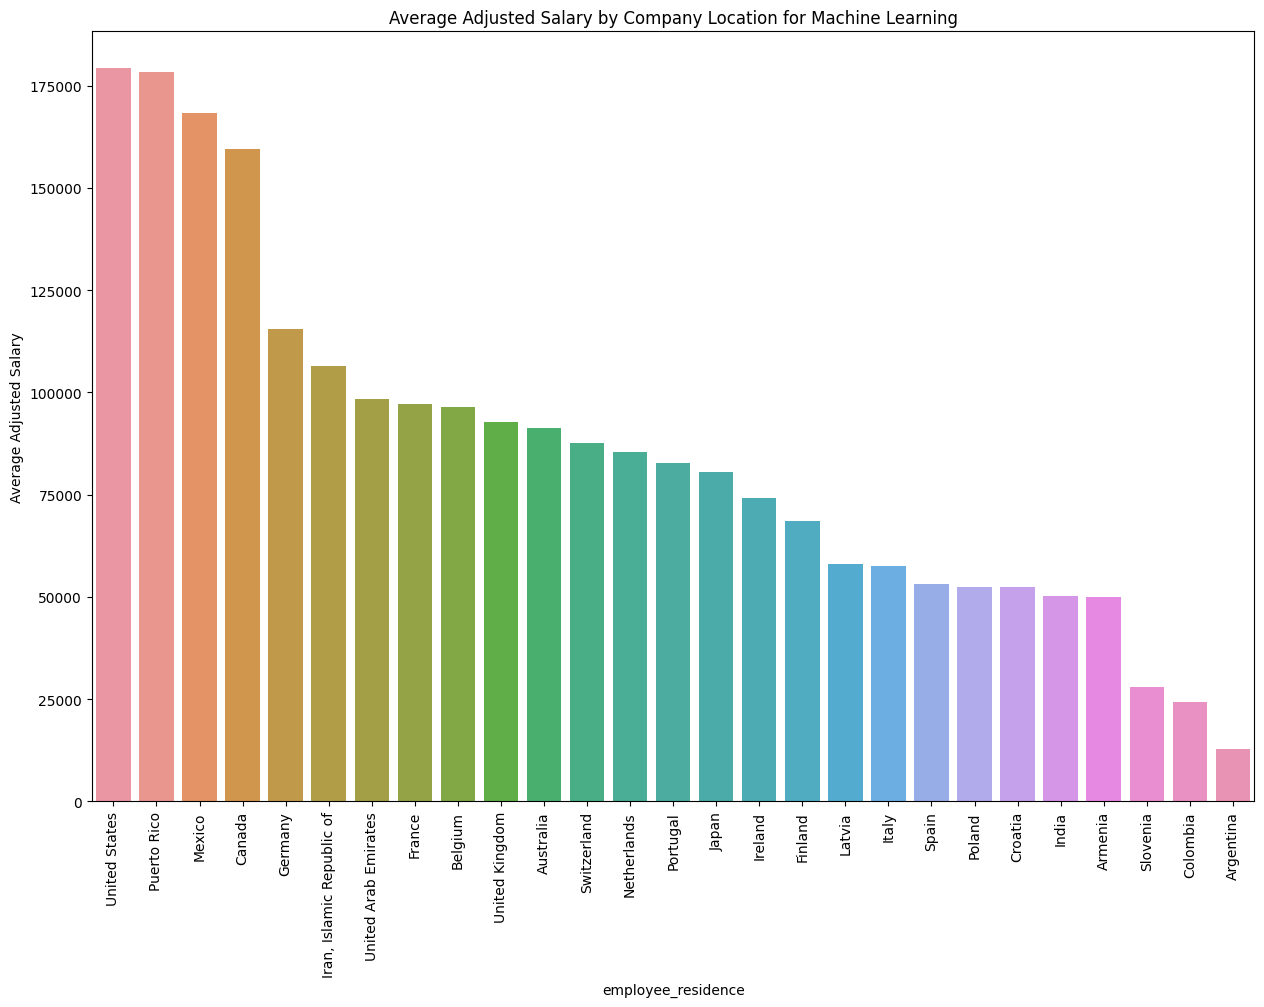

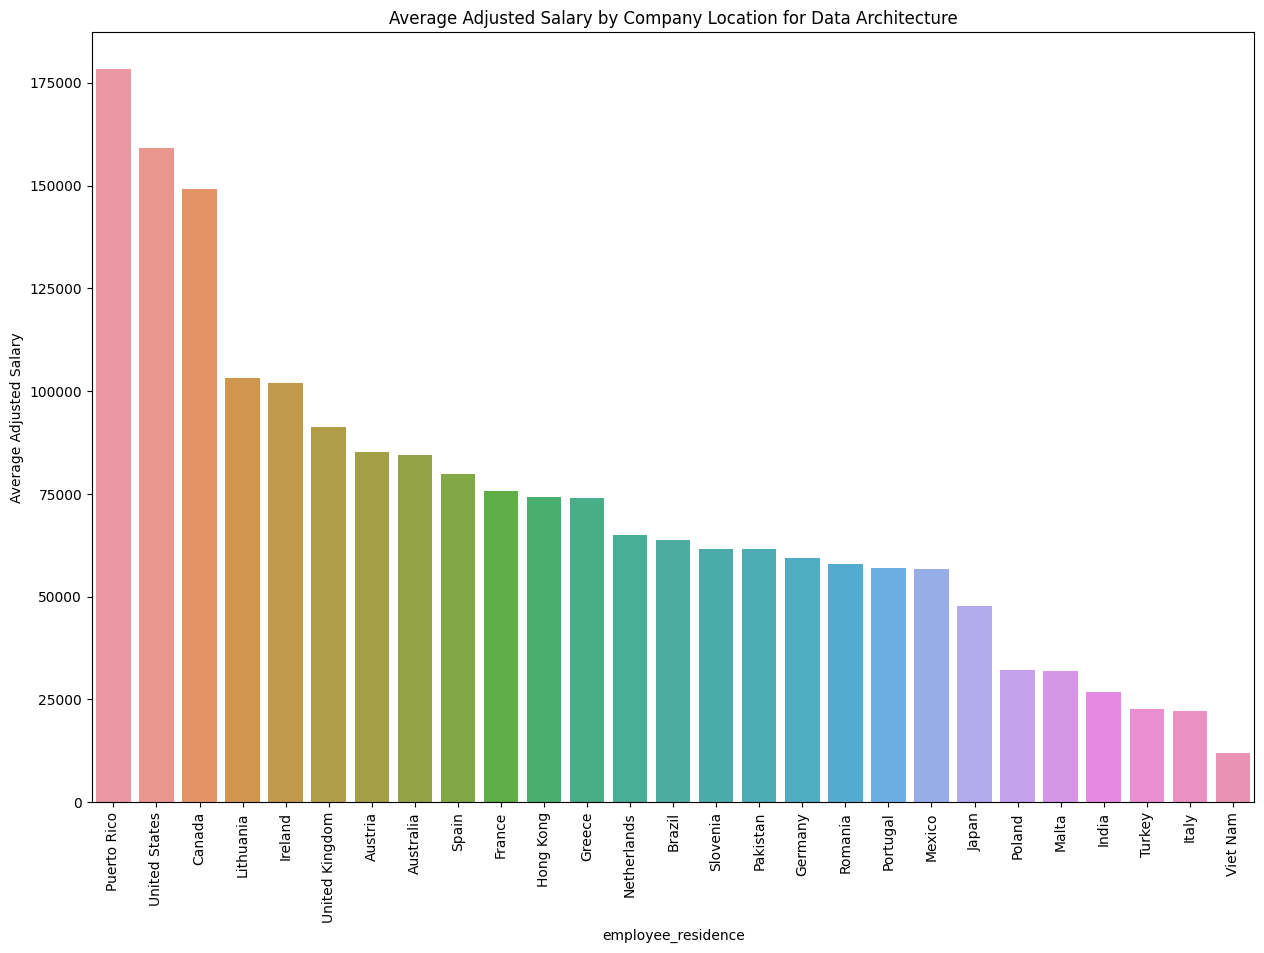

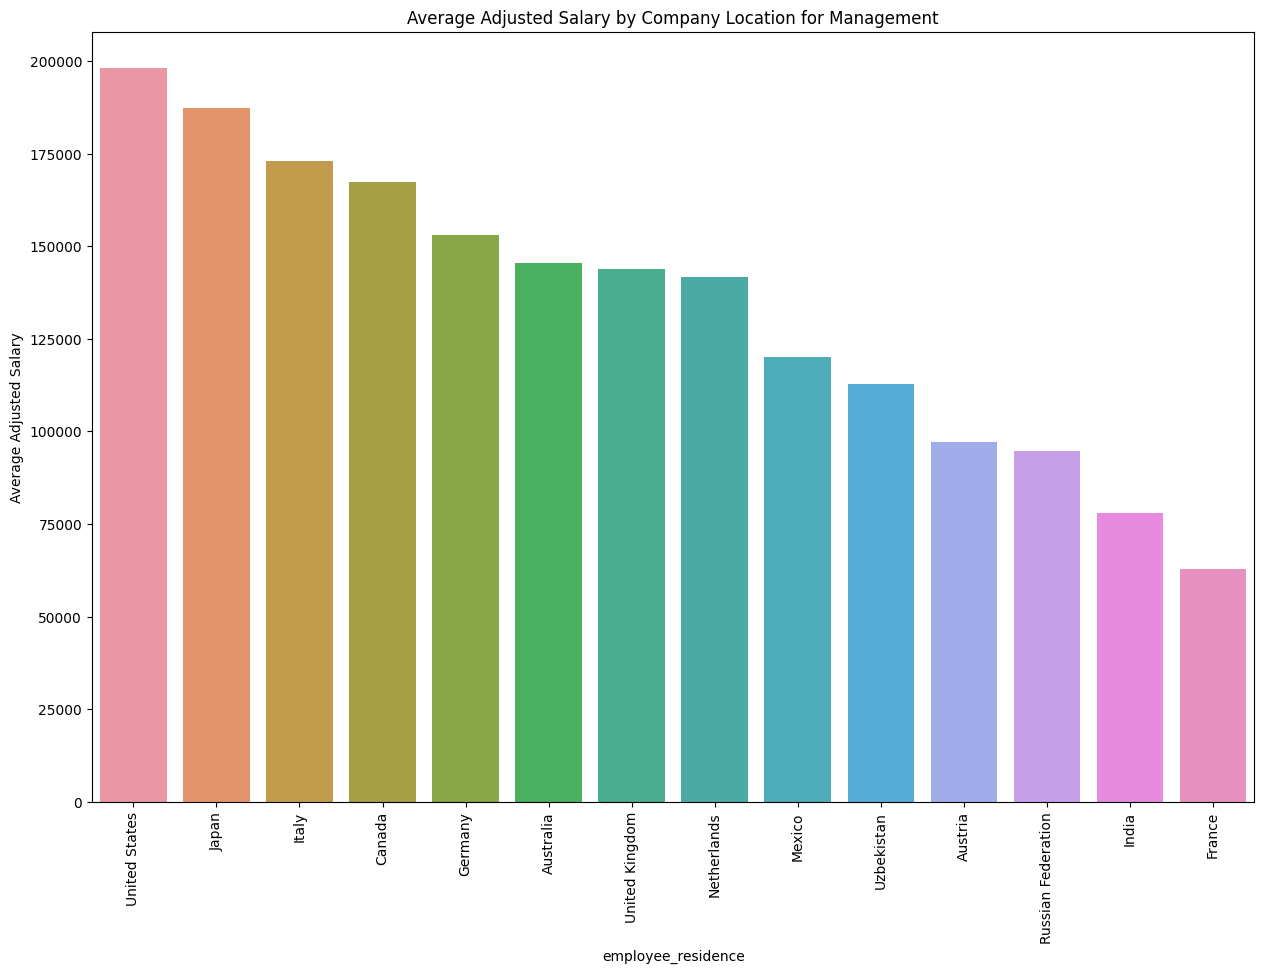

In [24]:
salary_location('employee_residence')

**Countries with higher number of remote jobs**

In [25]:
# Filter for remote_ratio of 100
full_remote = df[df['remote_ratio'] == 'Full-Remote']

# Aggregate by country code
country_counts = full_remote['company_location'].value_counts().reset_index()
country_counts.columns = ['country_code', 'count']

# Convert country codes to full names
country_counts['country_name'] = country_counts['country_code'].apply(country_code_to_name)

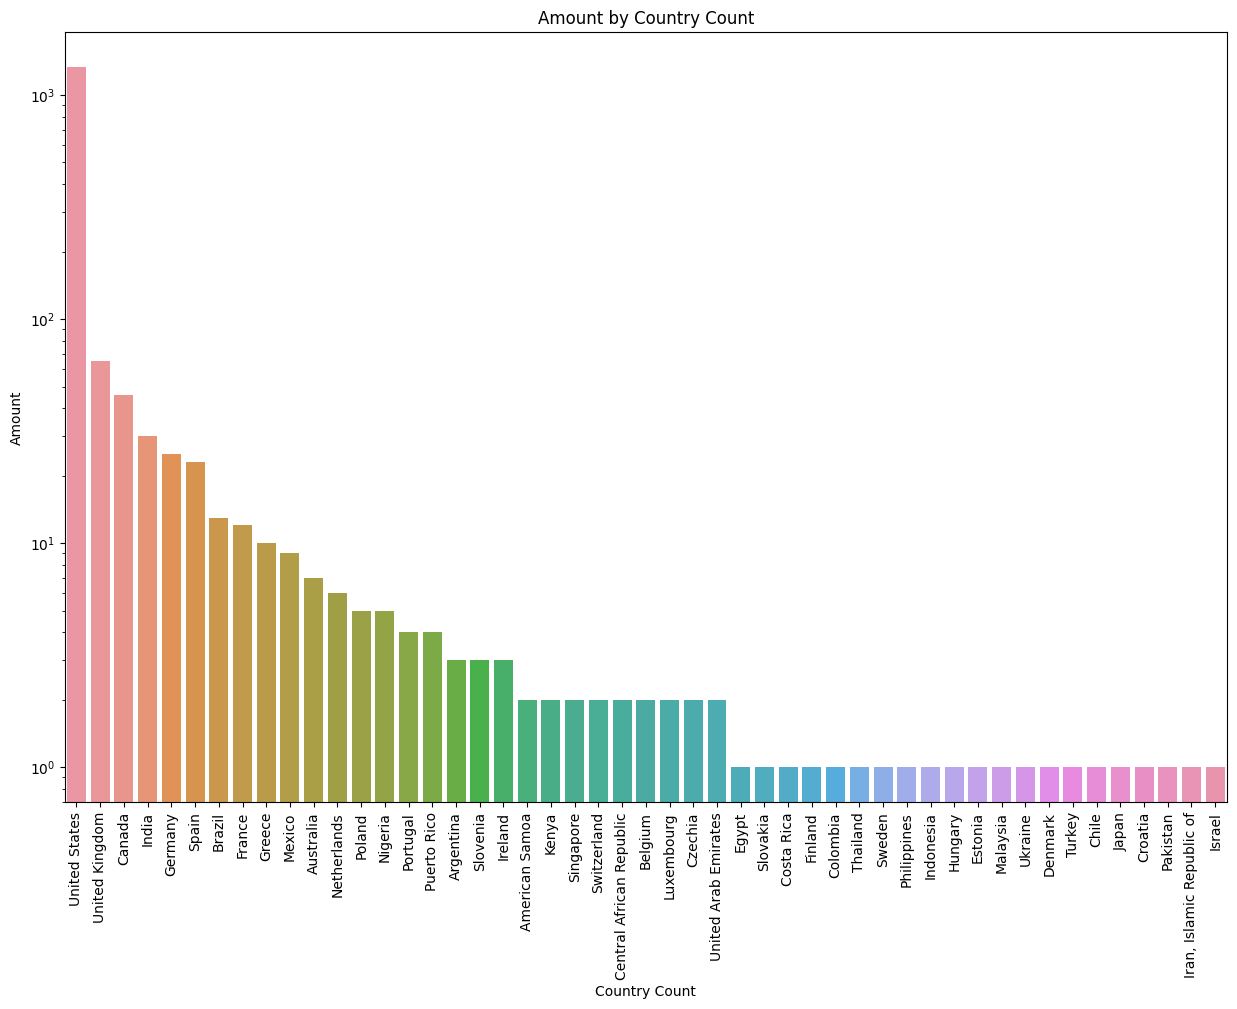

In [26]:
country_counts = country_counts.sort_values('count', ascending=False)

plt.figure(figsize=(15, 10))

# Create barplot for 'country_count'
sns.barplot(x='country_code', y='count', data=country_counts)

plt.title('Amount by Country Count')
plt.xlabel('Country Count')
plt.ylabel('Amount')

plt.yscale('log')
plt.xticks(rotation=90) # Rotates X-axis labels for readability

plt.show()


Countries with higher number of on-site jobs

In [27]:
# Filter for remote_ratio of 100
remote_0 = df[df['remote_ratio'] == 'On-Site']

# Aggregate by country code
country_counts = remote_0['company_location'].value_counts().reset_index()
country_counts.columns = ['country_code', 'count']

# Convert country codes to full names
country_counts['country_name'] = country_counts['country_code'].apply(country_code_to_name)

# Create the choropleth map with a logarithmic color scale
fig = px.choropleth(country_counts,
                    locations='country_name',
                    locationmode='country names',
                    color=np.log10(country_counts['count']),
                    hover_name='country_name',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Choropleth Map of On-Site Company Locations',
                    projection='natural earth')

# Customize the colorbar to show the original count values
fig.update_coloraxes(colorbar=dict(title='Count (company)', tickvals=[0, 1, 2, 3], ticktext=['1', '10', '100', '1000']))

# Show the map
fig.show()

In [28]:
# Filter for remote_ratio of 100
on_site = df[df['remote_ratio'] == 'On-Site']

# Aggregate by country code
country_counts = on_site['company_location'].value_counts().reset_index()
country_counts.columns = ['country_code', 'count']

# Convert country codes to full names
country_counts['country_name'] = country_counts['country_code'].apply(country_code_to_name)

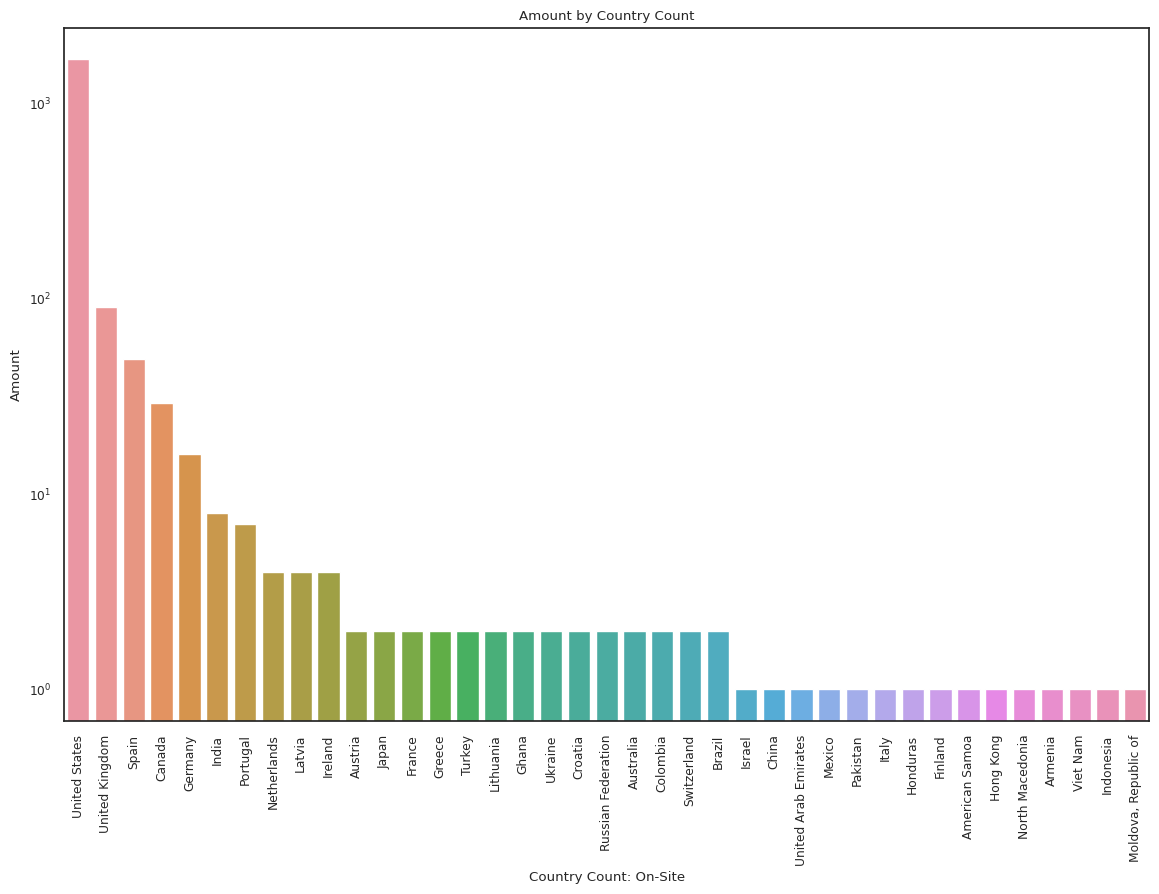

In [43]:
country_counts = country_counts.sort_values('count', ascending=False)

plt.figure(figsize=(14, 9))

# Create barplot for 'country_count'
sns.barplot(x='country_code', y='count', data=country_counts)

plt.title('Amount by Country Count')
plt.xlabel('Country Count: On-Site')
plt.ylabel('Amount')

plt.yscale('log')
plt.xticks(rotation=90) # Rotates X-axis labels for readability

plt.show()

#5. Correlation

In [30]:
# Define categorical and numeric values
cat_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
num_columns = ['adjusted_salary']

In [31]:
# Create dummies variables for categorical features
dummy_variables = pd.get_dummies(df, columns=cat_columns, drop_first=False)

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(df[num_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=num_columns)

In [32]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(num_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary','salary_in_usd'], axis=1)

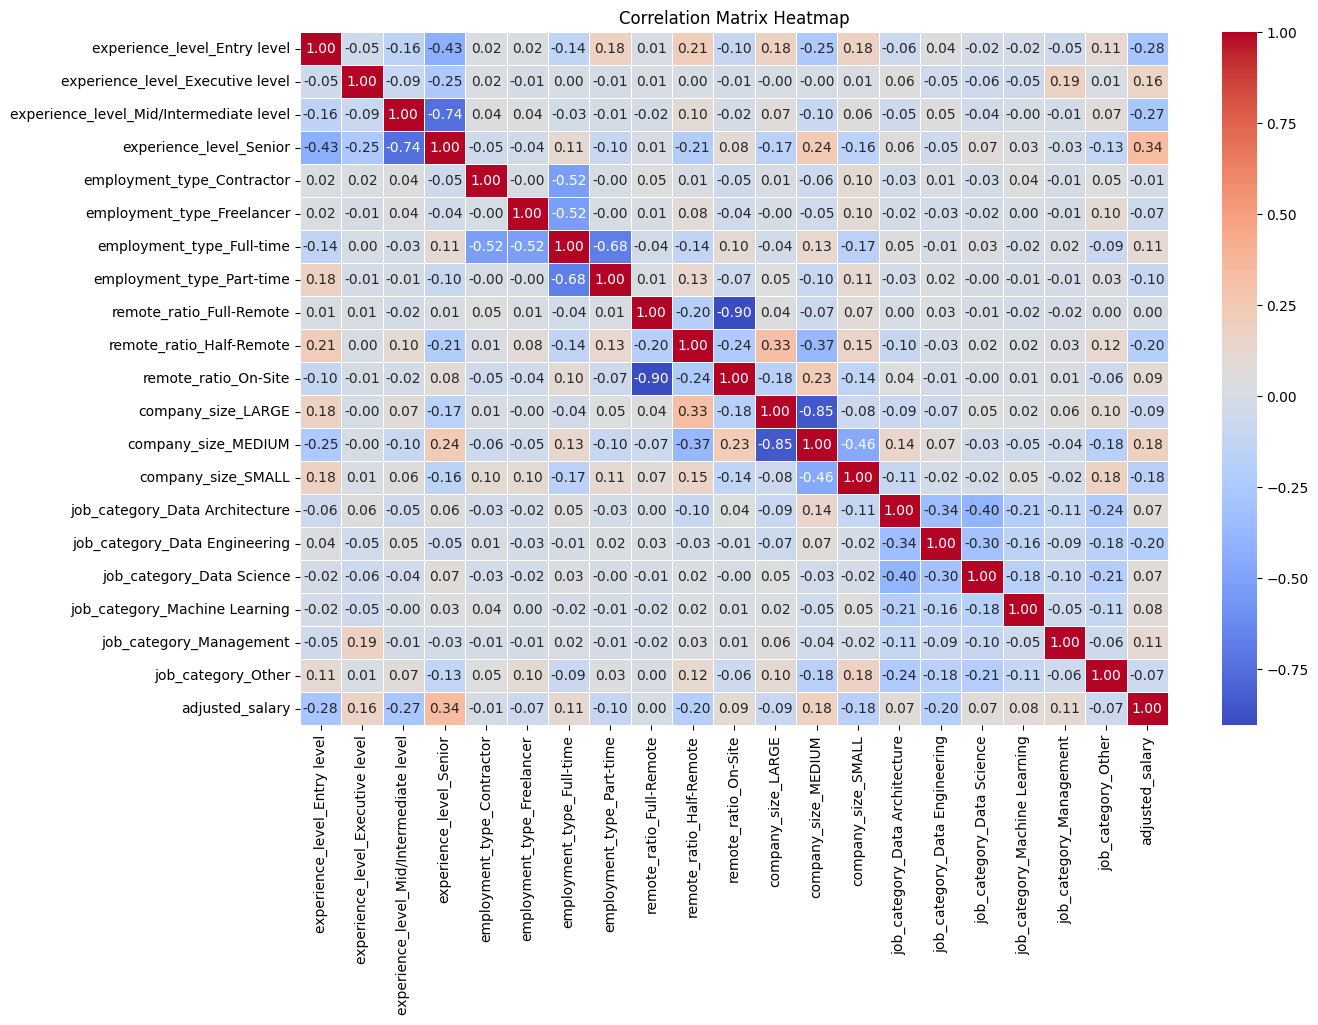

In [33]:
# Correlation heatmap
correlation_matrix = processed_df.corr()
plt.figure(figsize=(14, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

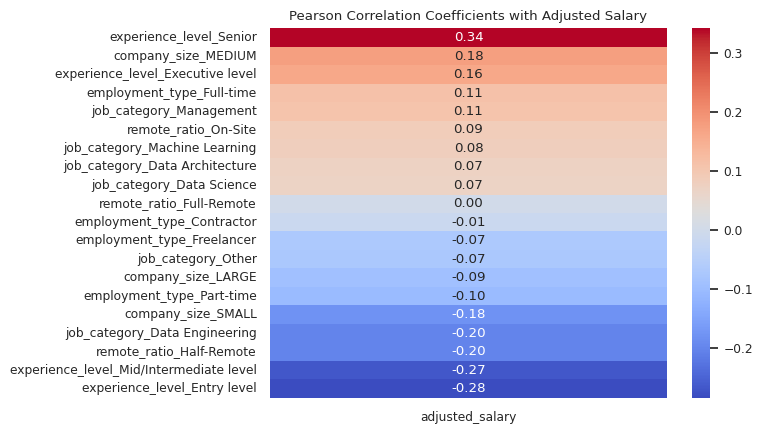

In [44]:
corr = processed_df.corr()
target_corr = corr['adjusted_salary'].drop('adjusted_salary')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Pearson Correlation Coefficients with Adjusted Salary')
plt.show()

#6. Prediction

In [35]:
df = df.drop(['work_year','salary','salary_currency','salary_in_usd','salary_in_usd','job_title'], axis=1)
df.head()

experience_level employment_type employee_residence remote_ratio  \
0                  Senior       Full-time              Spain  Full-Remote   
1  Mid/Intermediate level      Contractor      United States  Full-Remote   
2  Mid/Intermediate level      Contractor      United States  Full-Remote   
3                  Senior       Full-time             Canada  Full-Remote   
4                  Senior       Full-time             Canada  Full-Remote   

  company_location company_size      job_category  adjusted_salary  
0            Spain        LARGE             Other          85847.0  
1    United States        SMALL  Machine Learning          30000.0  
2    United States        SMALL  Machine Learning          25500.0  
3           Canada       MEDIUM      Data Science         175000.0  
4           Canada       MEDIUM      Data Science         120000.0

**Data Preprocessing**

In [36]:
# Label Encoding
le = LabelEncoder()

# Define categorical fetaures
cat_features = ['experience_level', 'employment_type', 'job_category', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

# Preprocessing: MinMax scaling for numerical/ratio variables

mm = MinMaxScaler()
num_features = ['adjusted_salary']
for feature in num_features:
    df[feature] = mm.fit_transform(df[feature].values.reshape(-1,1))

**Outlier handling**

In [37]:
# Remove Outlier with IQR: Adjusted salary
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

**Categorize salary based on quantiles**

In [38]:
quantiles = [0, 1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1]

# Define quantiles
bin_edges = [df['adjusted_salary'].quantile(q) for q in quantiles]

salary_labels = ['low', 'low-mid', 'mid', 'mid-high', 'high', 'very-high', 'Top']
df['salary_range'] = pd.cut(df['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

In [39]:
# Split the dataset into training and testing sets
X = df.drop(["adjusted_salary", "salary_range"], axis=1)
y = df["salary_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training and validation

In [40]:
# Define the models to test
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Model training, evaluation, and selection
best_model = None
best_score = -np.inf

# Create a pipeline for each model
print("Model performance:")
for name, model in models:
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy:.2f}")

    if accuracy > best_score:
        best_score = accuracy
        best_model = pipeline

print(f"Best model: {best_model.named_steps['model']} with accuracy: {best_score:.2f}")

Model performance:
Logistic Regression - Accuracy: 0.18
Random Forest - Accuracy: 0.22
Gradient Boosting - Accuracy: 0.23
Best model: GradientBoostingClassifier() with accuracy: 0.23


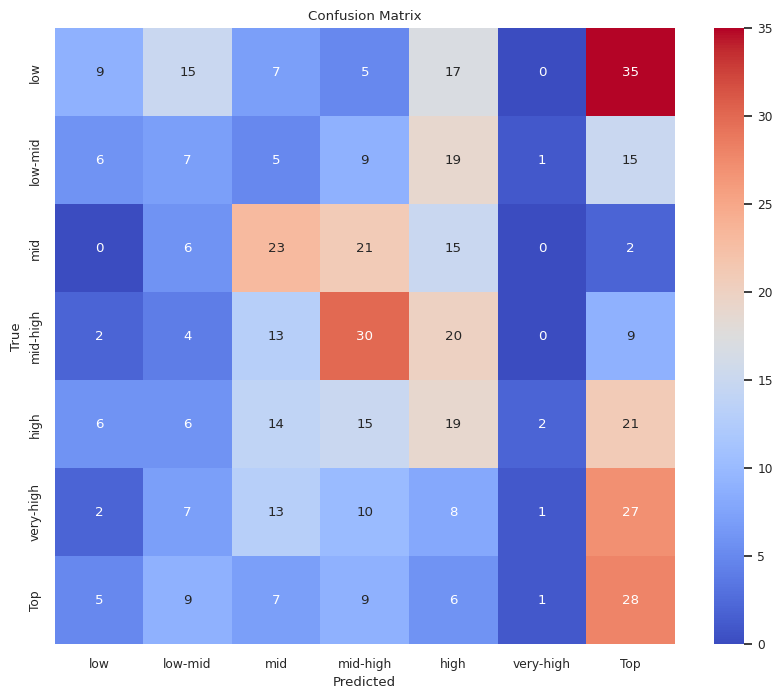

Classification Report:
              precision    recall  f1-score   support

         low       0.30      0.10      0.15        88
     low-mid       0.13      0.11      0.12        62
         mid       0.28      0.34      0.31        67
    mid-high       0.30      0.38      0.34        78
        high       0.18      0.23      0.20        83
   very-high       0.20      0.01      0.03        68
         Top       0.20      0.43      0.28        65

    accuracy                           0.23       511
   macro avg       0.23      0.23      0.20       511
weighted avg       0.23      0.23      0.21       511



In [41]:
# Generate the confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=salary_labels, yticklabels=salary_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=salary_labels))

In [42]:
# Visualize the adjusted_salary by different categories
cat_columns = ['employment_type', 'job_category', 'experience_level', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

# Determine the best categories for maximizing salary
def get_best_categories(df, cat_columns):
    best_categories = {}
    for col in cat_columns:
        best_category = df.groupby(col)['adjusted_salary'].mean().idxmax()
        best_categories[col] = best_category
    return best_categories

best_categories = get_best_categories(df, cat_columns)
print("Best categories for maximizing adjusted salary:")
for key, value in best_categories.items():
    print(f"{key.capitalize()}: {value}")

Best categories for maximizing adjusted salary:
Employment_type: 2
Job_category: 4
Experience_level: 1
Employee_residence: 75
Remote_ratio: 1
Company_location: 70
Company_size: 1


**Overall Findings:**

1. Most data science professionals make between 100,000 and 180,500 USD annually (a small fraction of professionals earn notably over the average.
2. Data scientists employed by firms headquartered in nations like Israel, the USA, and Russia usually receive higher average salaries. In contrast, companies based in South East Asia, Africa, and Eastern Europe tend to offer lower average remuneration.
3. Data scientists in countries such as Israel, the USA, and Puerto Rico typically enjoy higher average salaries.
4. The United States, the United Kingdom, Spain, Canada, and Germany are the top five countries with higher on-site job locations.
5. Data scientists are able to command high salaries by being employed by companies located in high-wage countries.
6. Data science management is the highest-paid job category.
7. The attributes that contribute to reaching the highest salary are Senior experience level, medium company size, full-time job, management category, on-site job, and ML/data architecture job category.
The best model was Gradient Boosting Classifier with an accuracy of 0.23.


Credits:
1. [PANNMIE](https://www.kaggle.com/code/tumpanjawat/ds-salary-full-eda-geo-cluster-xgboost#4-|-PREDICTIVE-ANALYSIS)
2. [CEDRIC AUBIN](https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries)
3. [TIRENDAZ AI](https://www.kaggle.com/code/tirendazacademy/eda-visualization-on-data-science-salaries)